In [1]:
# libraries
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
# options

%matplotlib inline 

pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_context('notebook')
sns.set_style('ticks')

In [3]:
# directories

#### Log

In [4]:
log_f = '../data/processed/scrape/3-31/log.csv'
log_df = pd.read_csv(log_f)

log_df.head(2)

,clean,eng,f_name,gps,label,message,orig,stem,time
0,141850.00,141850.00,../data/external/scrape/tweets_immigrant_34315...,885.00,1483.00,274215.00,274900.00,141849.00,15.76
1,180172.00,180172.00,../data/external/scrape/tweets_immigrant_34316...,2328.00,2341.00,374678.00,375600.00,180170.00,19.38


In [5]:
# How many of the tweets that we fed into the classifier were positive?
log_df['perc_+'] = log_df.label / log_df.stem

# How many of the positively classified users had GPS coordinated?
log_df['perc_gps'] = log_df.gps / log_df.label

log_df[['eng', 'stem', 'label', 'perc_+', 'gps', 'perc_gps']].describe()

,eng,stem,label,perc_+,gps,perc_gps
count,199.00,199.00,199.00,199.00,199.00,199.00
mean,322352.70,322351.73,2609.33,0.01,2586.21,0.99
std,228602.40,228602.29,3218.72,0.00,3223.01,0.08
min,12535.00,12535.00,114.00,0.00,114.00,0.46
25%,198913.00,198913.00,1163.00,0.00,1142.50,1.00
50%,262152.00,262152.00,1599.00,0.01,1597.00,1.00
75%,367090.00,367089.00,2605.50,0.01,2592.50,1.00
max,1647936.00,1647935.00,20848.00,0.04,20848.00,1.00


---

#### Hate Tweets

In [6]:
tweet_df = pd.read_csv('../data/processed/scrape/3-31/scrape-3-31.csv')

print ("{} tweets".format(tweet_df.shape[0]))
tweet_df.head(2)

514655 tweets


,username,longitude,latitude,date,message,tweetID,hashtag1,hashtag2,hashtag3,hashtag4,hashtag5,language,clean,stem,label
0,SoCaliMilitia1,3.30,6.47,Sun Jan 22 14:59:58 CST 2017,This is the (Sharia shit) law supports. Fuck ...,823274026248257536.00,WomensMarch,NaN,NaN,NaN,NaN,en,This is the Sharia shit law supports Fuck Isla...,thi the sharia shit law support fuck islam fuc...,1
1,swterry91,-77.04,38.90,Sun Jan 22 15:00:01 CST 2017,'Berlin: Anti-Trump non-Muslim feminists chant...,823274041607880704.00,tcot,NaN,NaN,NaN,NaN,en,Berlin Anti Trump non Muslim feminists chant A...,berlin anti trump non muslim feminist chant al...,1


#### Hashtags

In [12]:
cols_hash = ['hashtag1', 'hashtag2', 'hashtag3', 'hashtag4', 'hashtag5']

In [19]:
hash_1 = tweet_df['hashtag1'].str.lower().value_counts()
hash_2 = tweet_df['hashtag2'].str.lower().value_counts()
hash_3 = tweet_df['hashtag3'].str.lower().value_counts()
hash_4 = tweet_df['hashtag4'].str.lower().value_counts()
hash_5 = tweet_df['hashtag5'].str.lower().value_counts()

/home/rlrson/anaconda3/envs/gviz/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


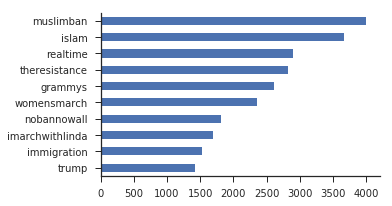

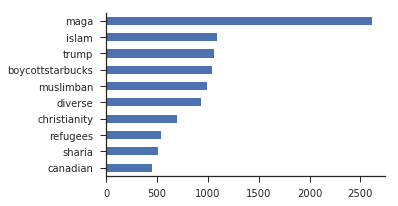

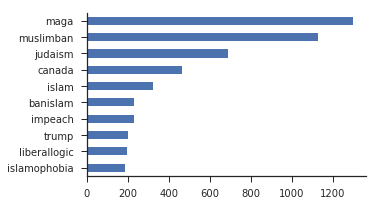

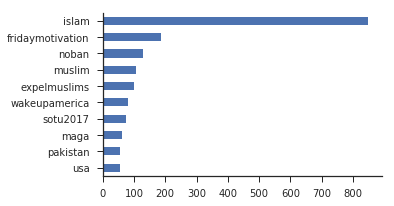

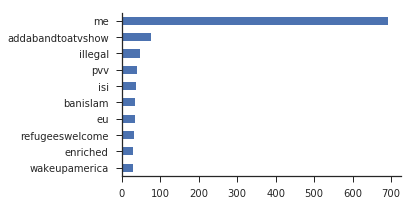

In [23]:
for df in [hash_1, hash_2, hash_3, hash_4, hash_5]:
    plt.figure(figsize=(5,3))
    df.head(10).sort_values(ascending=True).plot.barh()
    sns.despine()
    #plt.show()